In [2]:
import pandas as pd

# Load the dataset
data_path = 'datasets/Wine_Quality.csv'
wine_data = pd.read_csv(data_path)

# Display the first few rows and check for any basic information about the dataset
wine_data.head(), wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0  white            7.0              0.27         0.36            20.7   
 1  white            6.3              0.30         0.34             1.6   
 2  white            8.1              0.28         0.40             6.9   
 3  white            7.2              0.23         0.32             8.5   
 4  white            7.2              0.23         0.32             8.5   
 
    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
 0      0.045                 45.0                 170.0   1.0010  3.00   
 1      0.049                 14.0                 132.0   0.9940  3.30   
 2      0.050                 30.0                  97.0   0.9951  3.26   
 3      0.058                 47.0                 186.0   0.9956  3.19   
 4      0.058                 47.0                 186.0   0.9956  3.19   
 
    sulphates  alcohol  quality  
 0       0.45      8.8        6  
 1       0.49      9.5      

In [3]:
# Drop rows with missing values for simplicity
wine_data_cleaned = wine_data.dropna()

# Drop the non-numeric 'type' column for clustering purposes
wine_data_cleaned = wine_data_cleaned.drop(columns=['type'])

# Display the shape of the cleaned dataset
wine_data_cleaned.shape


(6463, 12)

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

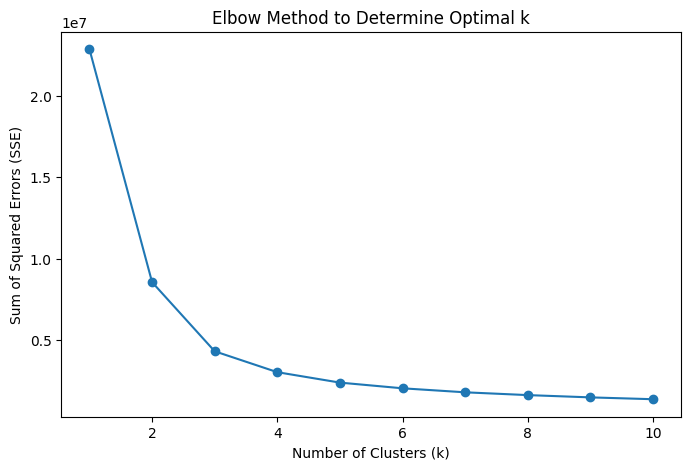

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
sse = []  # Sum of squared errors for each k
k_values = range(1, 11)  # Trying k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(wine_data_cleaned)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

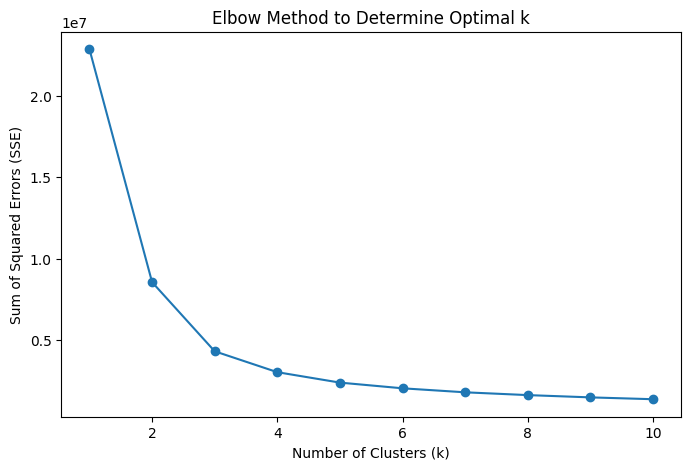

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Predicted cluster for the unknown wine data: 1


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the data
data_path = 'datasets/Wine_Quality.csv'
wine_data = pd.read_csv(data_path)

# Drop rows with missing values and the 'type' column
wine_data_cleaned = wine_data.dropna().drop(columns=['type'])

# Step 1: Elbow Method to find optimal k
sse = []  # Sum of squared errors for each k
k_values = range(1, 11)  # Trying k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(wine_data_cleaned)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Choose an optimal k based on the elbow plot (e.g., k = 3)
optimal_k = 3

# Step 2: Build the k-means model with the optimal k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_model.fit(wine_data_cleaned)

# Step 3: Predict using new, unknown values
# Example unknown wine characteristics
unknown_values = np.array([[7.0, 0.3, 0.3, 1.6, 0.04, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6]])

# Predict the cluster for the unknown values
predicted_cluster = kmeans_model.predict(unknown_values)

print("Predicted cluster for the unknown wine data:", predicted_cluster[0])


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

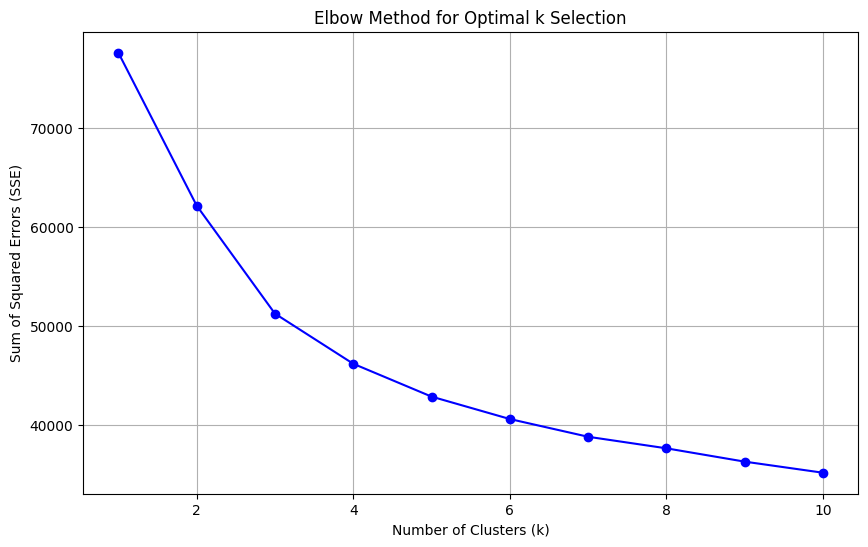

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Please enter the following wine characteristics:


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

class WineClassifier:
    """A class to classify wines using K-means clustering."""
    
    FEATURE_NAMES = [
        "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
        "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
        "ph", "sulphates", "alcohol"
    ]
    
    def __init__(self, data_path: str):
        """
        Initialize the wine classifier.
        
        Args:
            data_path (str): Path to the wine quality CSV file
        """
        self.data_path = data_path
        self.scaler = StandardScaler()
        self.kmeans_model = None
        self.wine_data = None
        self.scaled_data = None
        
    def load_and_preprocess_data(self) -> None:
        """Load and preprocess the wine data."""
        try:
            # Load the data
            self.wine_data = pd.read_csv(self.data_path)
            
            # Clean the data
            self.wine_data = self.wine_data.dropna()
            if 'type' in self.wine_data.columns:
                self.wine_data = self.wine_data.drop(columns=['type'])
                
            # Scale the features
            self.scaled_data = self.scaler.fit_transform(self.wine_data)
            
        except FileNotFoundError:
            raise FileNotFoundError(f"Could not find the data file at {self.data_path}")
        except Exception as e:
            raise Exception(f"Error processing data: {str(e)}")

    def find_optimal_k(self, max_k: int = 10) -> Tuple[List[int], List[float]]:
        """
        Use the elbow method to find the optimal number of clusters.
        
        Args:
            max_k (int): Maximum number of clusters to try
            
        Returns:
            Tuple[List[int], List[float]]: k values and corresponding SSE values
        """
        if self.scaled_data is None:
            raise ValueError("Data not loaded. Call load_and_preprocess_data first.")
            
        k_values = range(1, max_k + 1)
        sse = []
        
        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=0)
            kmeans.fit(self.scaled_data)
            sse.append(kmeans.inertia_)
            
        return list(k_values), sse

    def plot_elbow_curve(self, k_values: List[int], sse: List[float]) -> None:
        """
        Plot the elbow curve.
        
        Args:
            k_values (List[int]): List of k values
            sse (List[float]): List of SSE values
        """
        plt.figure(figsize=(10, 6))
        plt.plot(k_values, sse, 'bo-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.title('Elbow Method for Optimal k Selection')
        plt.grid(True)
        plt.show()

    def train_model(self, n_clusters: int) -> None:
        """
        Train the K-means model with the specified number of clusters.
        
        Args:
            n_clusters (int): Number of clusters to use
        """
        if self.scaled_data is None:
            raise ValueError("Data not loaded. Call load_and_preprocess_data first.")
            
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
        self.kmeans_model.fit(self.scaled_data)

    def predict_cluster(self, wine_features: List[float]) -> int:
        """
        Predict the cluster for a new wine sample.
        
        Args:
            wine_features (List[float]): List of wine characteristics
            
        Returns:
            int: Predicted cluster number
        """
        if self.kmeans_model is None:
            raise ValueError("Model not trained. Call train_model first.")
            
        if len(wine_features) != len(self.FEATURE_NAMES):
            raise ValueError(f"Expected {len(self.FEATURE_NAMES)} features, got {len(wine_features)}")
            
        # Scale the input features
        scaled_features = self.scaler.transform([wine_features])
        return self.kmeans_model.predict(scaled_features)[0]

    def get_cluster_characteristics(self, cluster_id: int) -> pd.DataFrame:
        """
        Get the average characteristics of wines in a specific cluster.
        
        Args:
            cluster_id (int): Cluster identifier
            
        Returns:
            pd.DataFrame: Average characteristics of the cluster
        """
        if self.kmeans_model is None:
            raise ValueError("Model not trained. Call train_model first.")
            
        cluster_labels = self.kmeans_model.labels_
        cluster_data = self.wine_data[cluster_labels == cluster_id]
        
        return cluster_data.mean().round(3)

    @staticmethod
    def get_user_input() -> List[float]:
        """
        Get wine characteristics from user input.
        
        Returns:
            List[float]: List of wine characteristics
        """
        print("\nPlease enter the following wine characteristics:")
        user_input = []
        
        for i, feature in enumerate(WineClassifier.FEATURE_NAMES, 1):
            while True:
                try:
                    value = float(input(f"{i}. {feature.replace('_', ' ').title()}: "))
                    user_input.append(value)
                    break
                except ValueError:
                    print("Please enter a valid number.")
                    
        return user_input

def main():
    # Initialize and train the classifier
    classifier = WineClassifier('datasets/Wine_Quality.csv')
    classifier.load_and_preprocess_data()
    
    # Find optimal k
    k_values, sse = classifier.find_optimal_k()
    classifier.plot_elbow_curve(k_values, sse)
    
    # Train model with optimal k (3 clusters)
    optimal_k = 3
    classifier.train_model(optimal_k)
    
    # Get user input and make prediction
    wine_features = classifier.get_user_input()
    predicted_cluster = classifier.predict_cluster(wine_features)
    
    print(f"\nPredicted cluster for the wine: {predicted_cluster}")
    print("\nAverage characteristics of wines in this cluster:")
    print(classifier.get_cluster_characteristics(predicted_cluster))

if __name__ == "__main__":
    main()